In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fc
import importlib

importlib.reload(fc)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_48004\2591684422.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<module 'functions' from 'c:\\Users\\Sabrina\\Desktop\\TestDA\\Week_9\\Final_project\\notebooks\\functions.py'>

In [2]:
cleaned_video_games = pd.read_csv('..\data\cleaned\cleaned_video_games_df.csv')
cleaned_video_games


,Unnamed: 0,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


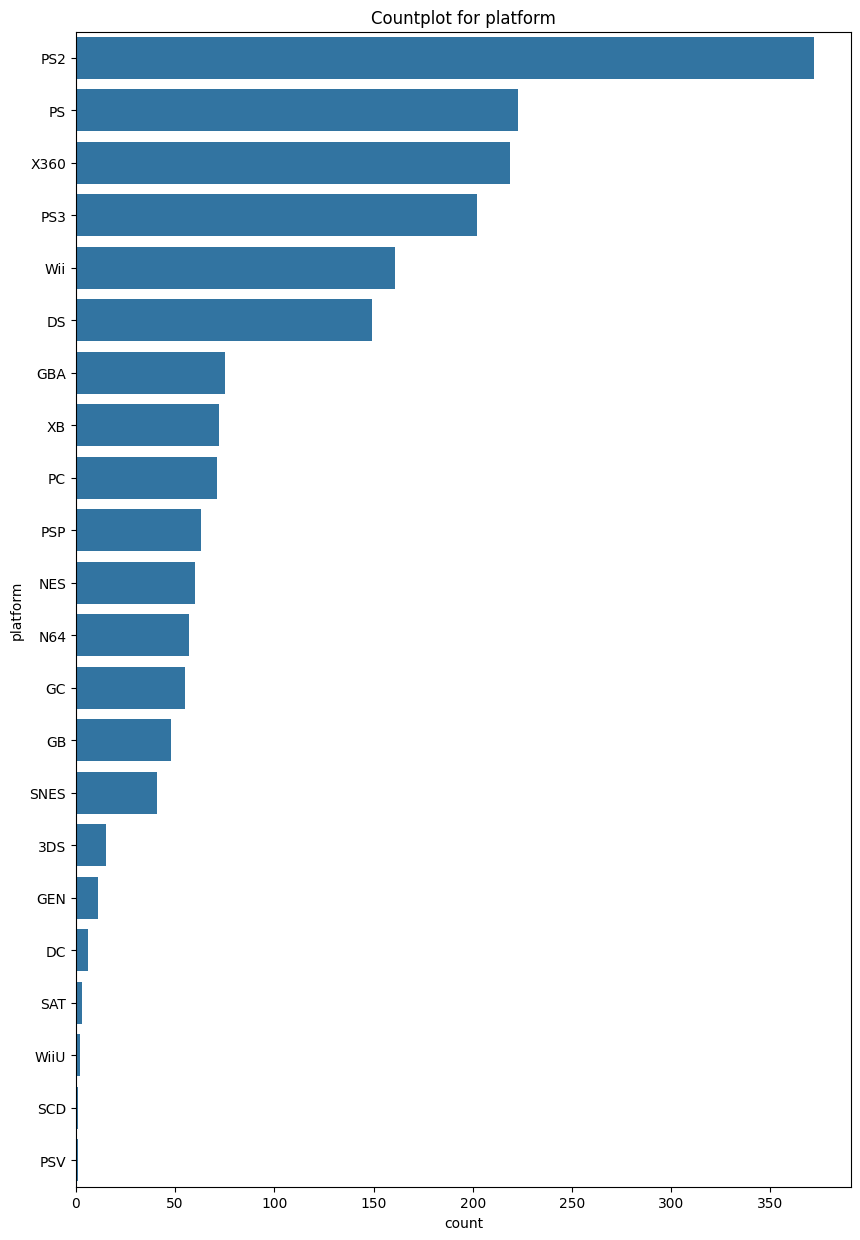

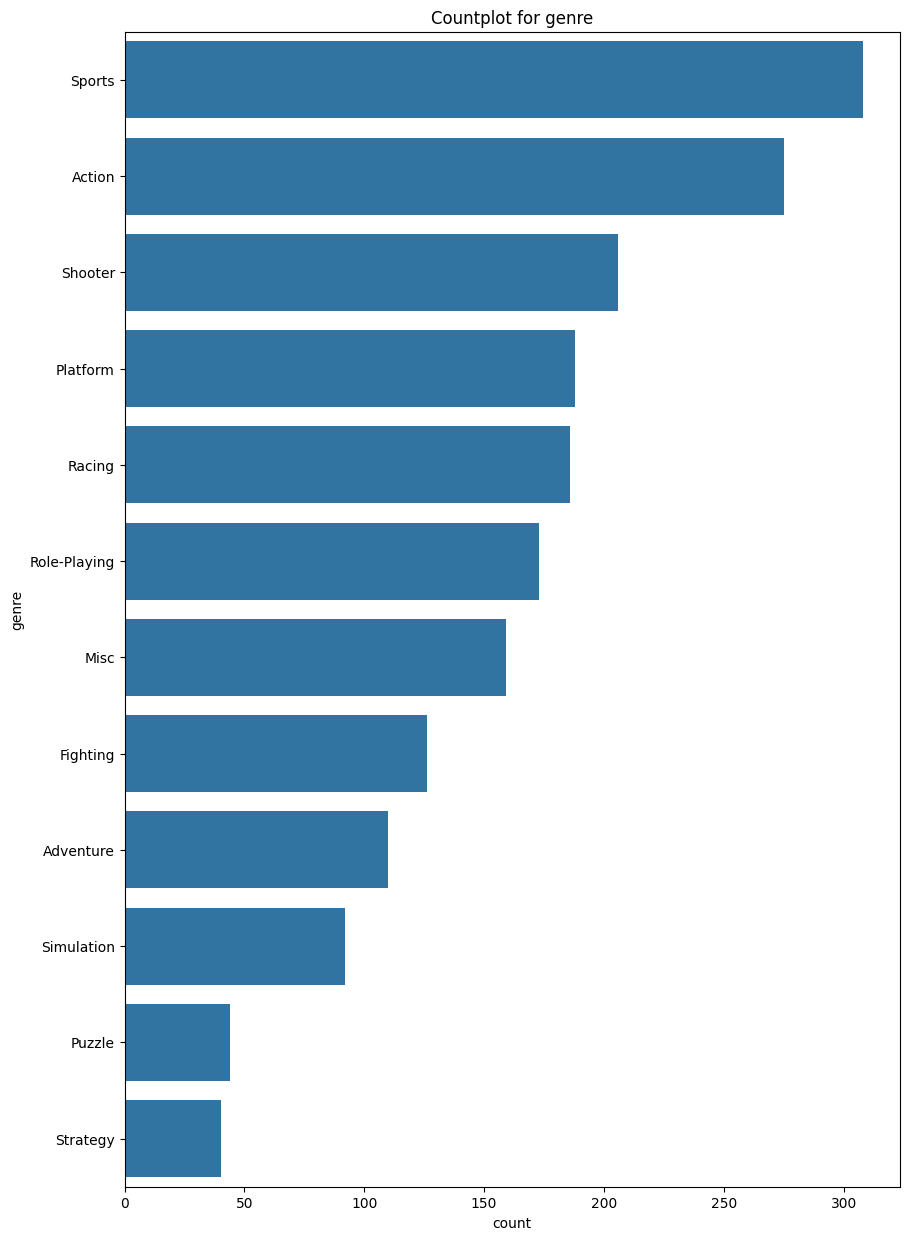

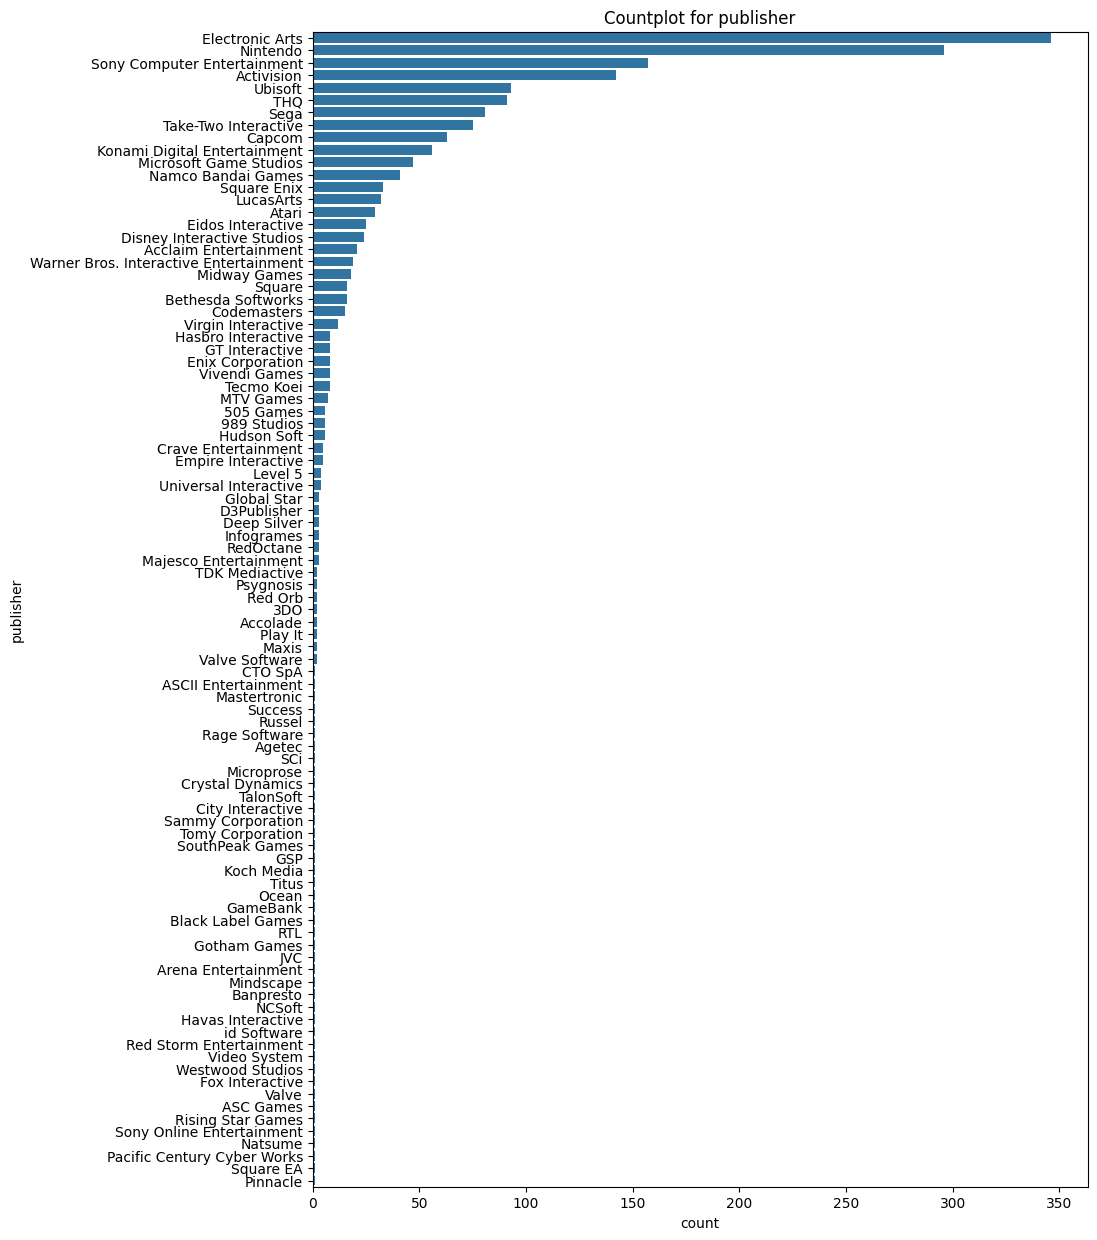

In [3]:
categorical_variables = cleaned_video_games.drop(columns='game_title').select_dtypes(exclude=np.number)
fc.countplot_categorical_variables(categorical_variables, 15, 10)

## EDA platform sales

In [4]:
sales_df = cleaned_video_games[['platform', 'year', 'genre', 'publisher', 'global']]
platform_sales = fc.df_grouping(sales_df, 'platform', 'global')
platform_sales

,year,platform,global
0,2004,PS2,156.44
1,2002,PS2,153.36
2,2003,PS2,133.21
3,2006,Wii,128.75
4,2009,Wii,128.48
...,...,...,...
143,1994,SAT,1.07
144,2006,XB,1.02
145,2000,XB,0.99
146,1975,PS2,0.95


In [5]:
platforms = platform_sales['platform'].unique().tolist()
platforms

['PS2',
 'Wii',
 'X360',
 'DS',
 'PS',
 'PS3',
 'GB',
 'NES',
 'GBA',
 'XB',
 'N64',
 'PSP',
 'GC',
 'SNES',
 '3DS',
 'PC',
 'GEN',
 'DC',
 'WiiU',
 'SAT',
 'SCD',
 'PSV']

In [6]:
#for a better readability in the lineplot, I'll be separating platforms by companies. 

sony_platform_df = platform_sales.copy()
sony_platform_df = sony_platform_df[sony_platform_df['platform'].isin(['PS2', 'PS', 'PS3', 'PSP', 'PSV'])]
#sony_platform_df

nintendo_platform_df = platform_sales.copy()
nintendo_platform_df = nintendo_platform_df[nintendo_platform_df['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', '3DS', 'Wii','WiiU'])]
#nintendo_platform_df

sega_platforms_df = platform_sales.copy()
sega_platforms_df = sega_platforms_df[sega_platforms_df['platform'].isin(['GEN', 'SCD', 'SAT', 'DC'])]
#sega_platforms_df

microsoft_platforms_df = platform_sales.copy()
microsoft_platforms_df = microsoft_platforms_df[microsoft_platforms_df['platform'].isin(['XB', 'X360'])]
microsoft_platforms_df

,year,platform,global
6,2010,X360,122.19
13,2008,X360,98.38
14,2011,X360,93.00
22,2009,X360,76.76
25,2007,X360,63.59
30,2012,X360,55.84
43,2004,XB,34.22
45,2006,X360,32.98
62,2003,XB,23.90
66,2002,XB,20.75


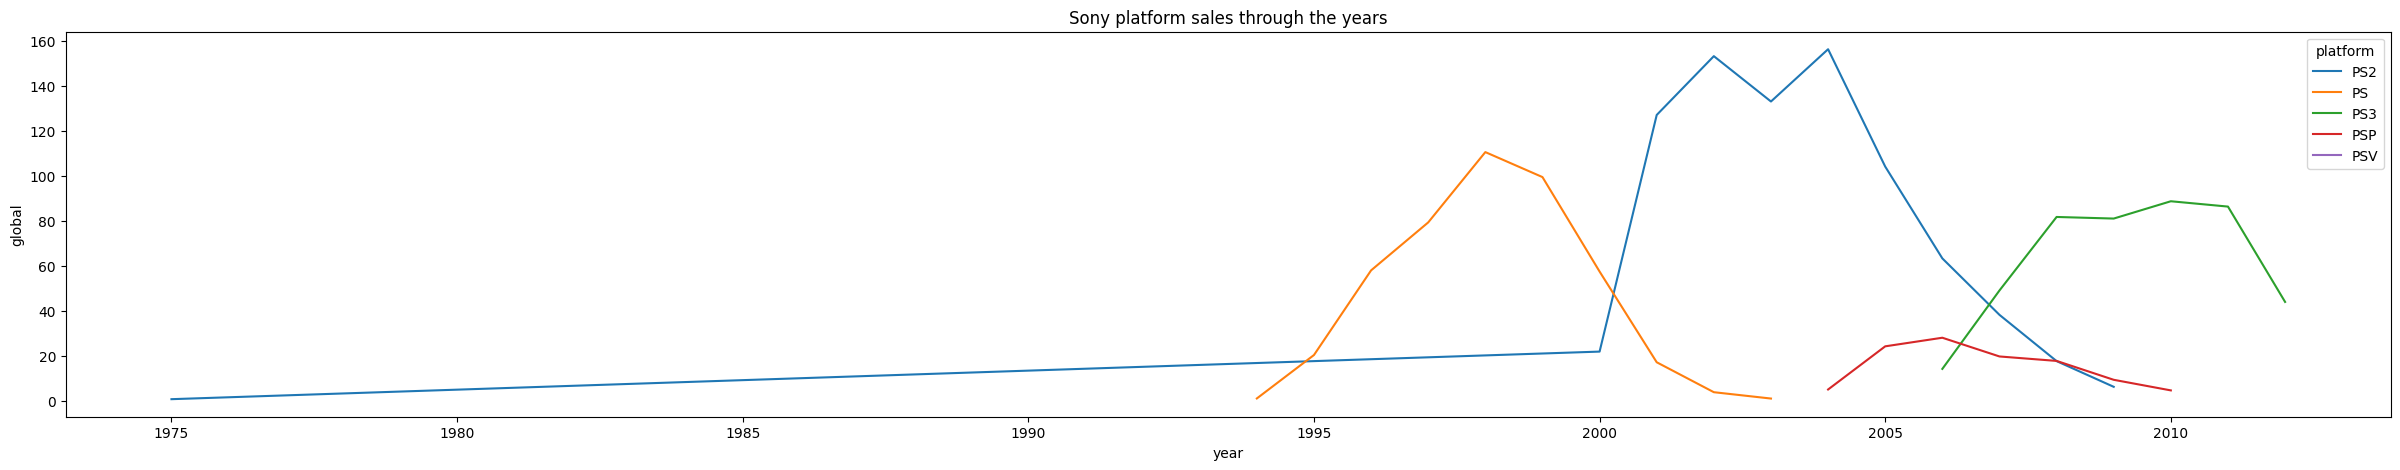

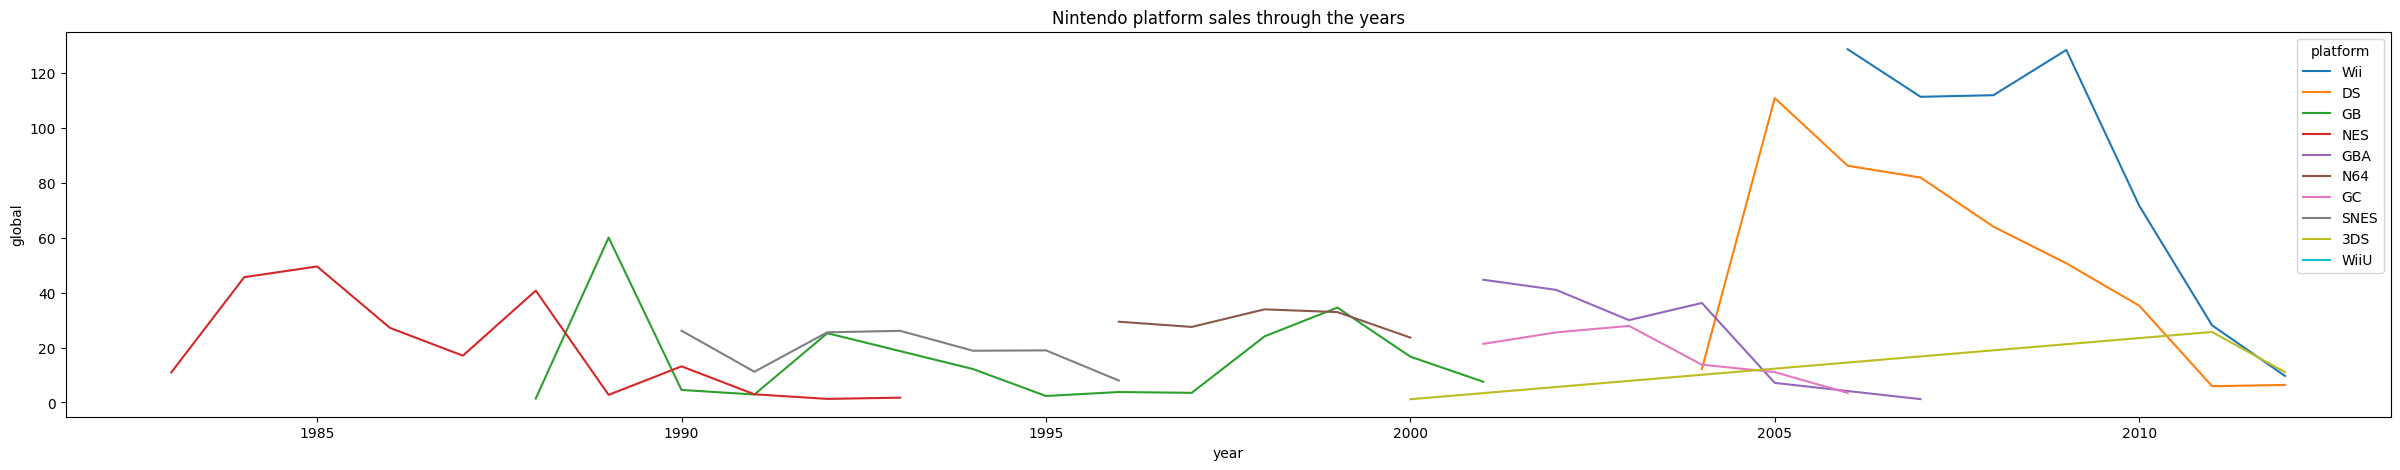

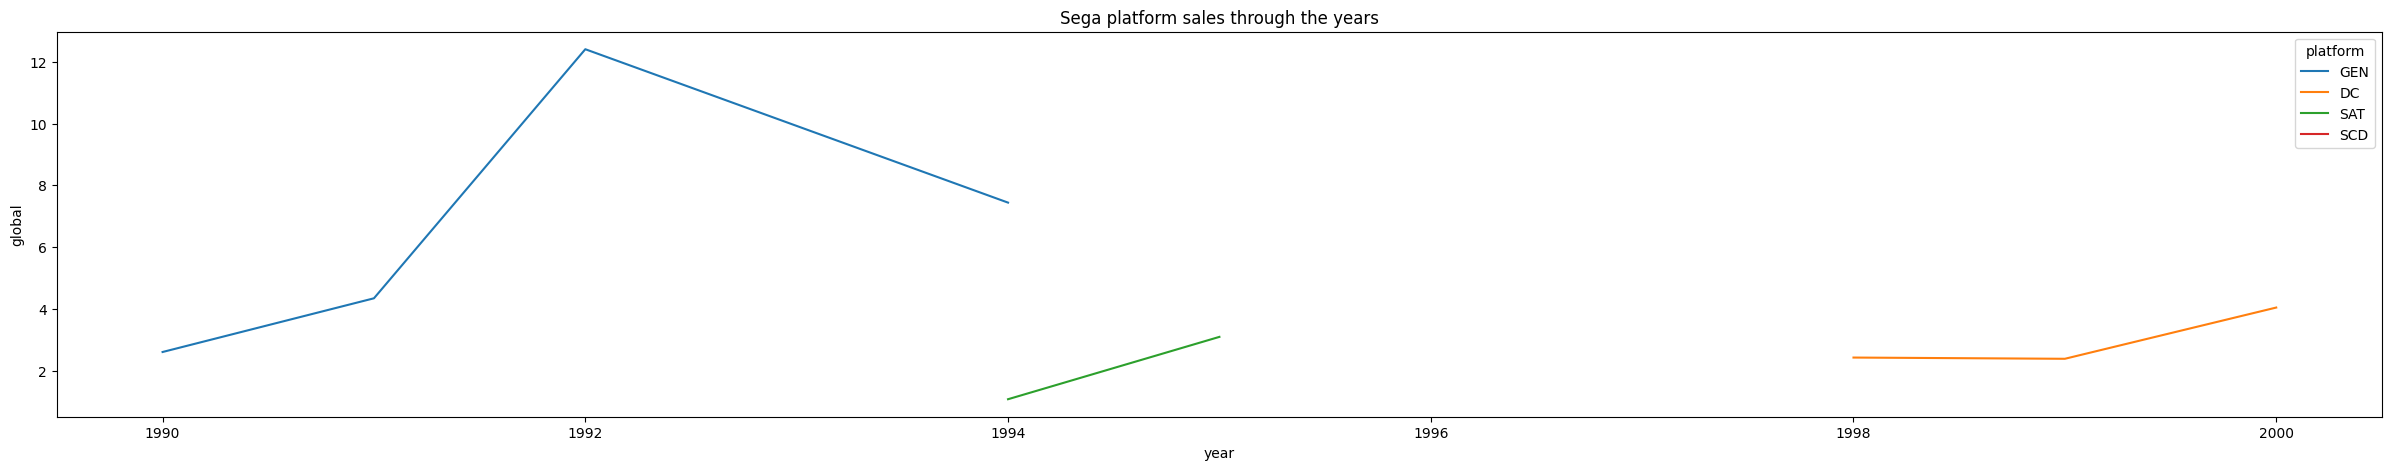

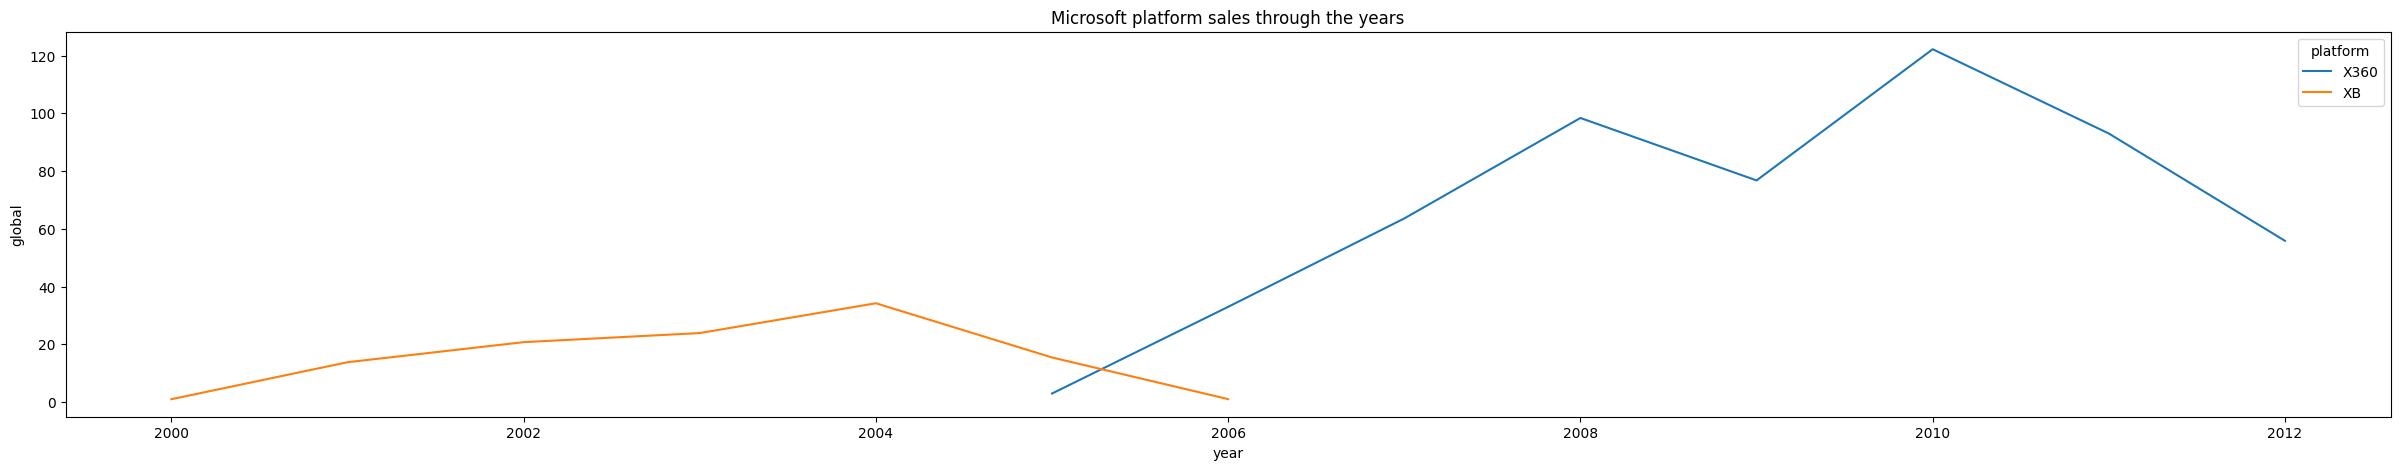

In [7]:
platform_df_list= [sony_platform_df, nintendo_platform_df, sega_platforms_df, microsoft_platforms_df]
platforms_names_list = ['Sony platform', 'Nintendo platform', 'Sega platform', 'Microsoft platform']

fc.lineplot( platform_df_list, platforms_names_list, 'platform')

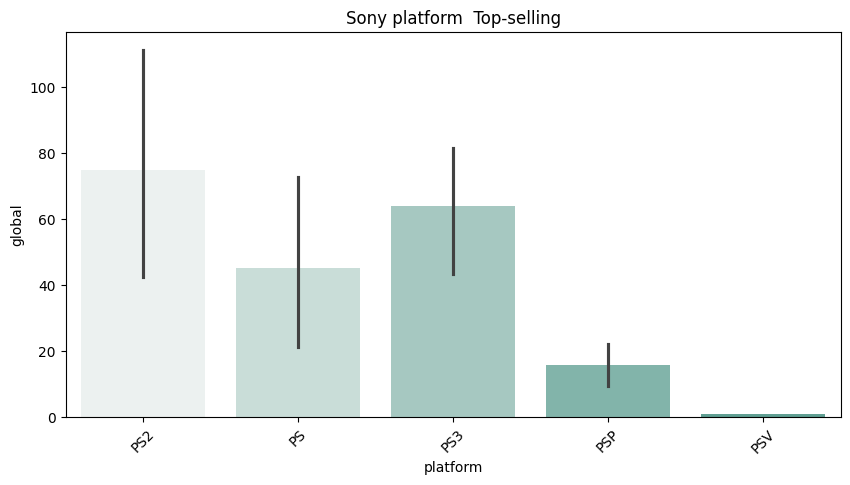

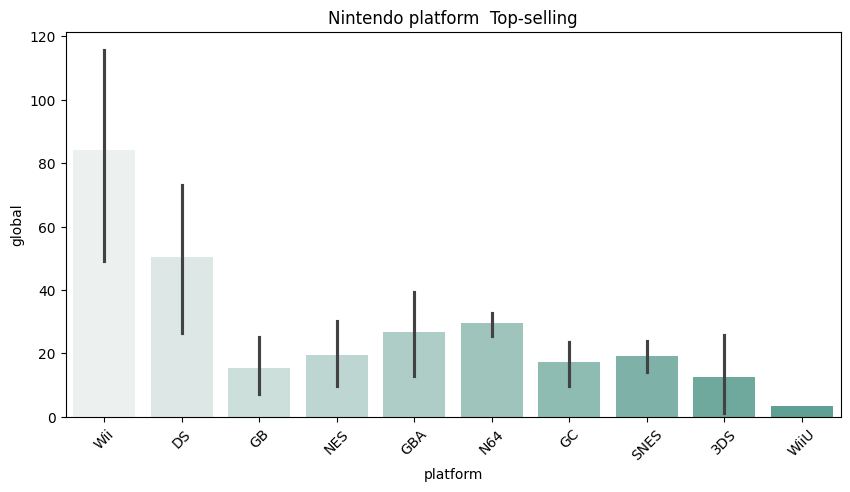

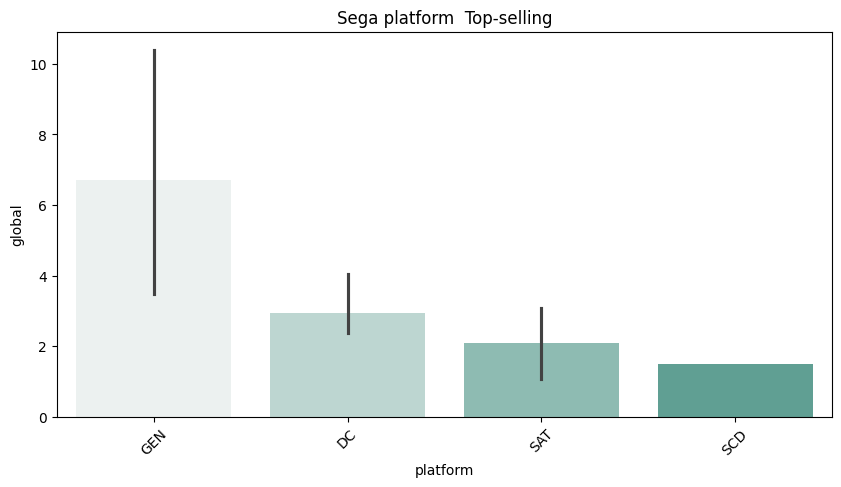

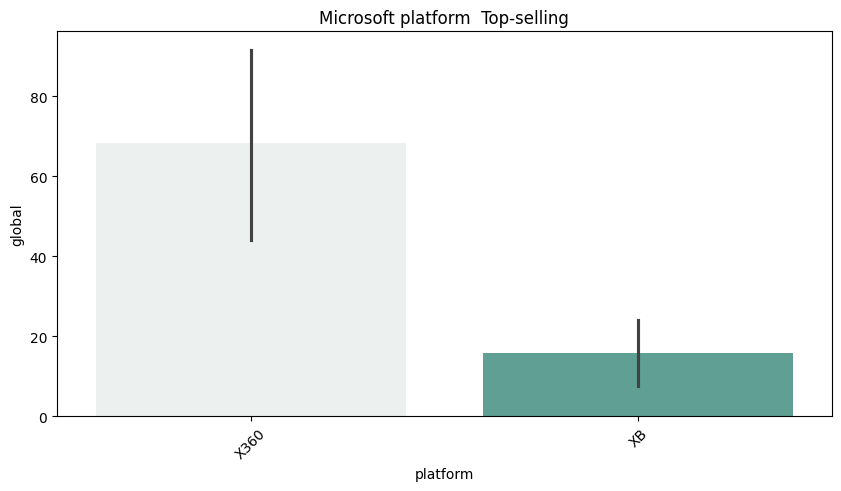

In [8]:
fc.barplot(platform_df_list, platforms_names_list, 'platform', 10)

From both charts on top we can see:

• Sony's peak sales was with PS2 from 2000-2005, decresing considerably between 2009-2010. Followed by the PS having it's peak around 1997 prior to the PS2 launch. PSP had a small peak around 2006, while PS3 considering the dataset comes up to 2012 has its peak between 2010-2011. PS2 was sold the most. 

• Ninento has a few different platforms which its greater peak was with the Wii around 2009-2010 without surpassing the sells in PS2 from Sony. Closely followed by the games unit sells in DS. Rest of Nintendo platform sales between 1975 - 2012 are lower than 70 millions sold, comparing to the +120 millions sold by the Wii and +150millions sold in PS2. Wii was sold the most by difference. 

• For Sega on the other hand, platform sells are all under 25millions sold, being their peak with GEN (Sega Genesis) in 1992. GEN was sold the most with not such a wide difference. 

• When it comes to Microsoft platforms until 2012, peak is found on the X360 with a slightly amount over the 120 million units sold. X360 was the most sold when it comes to Microsoft with great difference. 

In [9]:
platform_sales['global'].describe().round(3)

count    148.000
mean      32.074
std       36.865
min        0.930
25%        5.760
50%       17.905
75%       41.820
max      156.440
Name: global, dtype: float64

We can see that average global sales per platform is set in 32.07 million units sold, with a standard deviation of 36.87 million units sold. 

Along the platforms, we have a minimum amount of 0.93 million units sold which differs in a 99.40% with the maximum amount of million units sold, which is a very high difference. Half of the platforms has up to 17.91 million units sold and 75% of them between 17.91-41.82 million units sold which still differs in a 73.27% with the maximum amount of million units sold. 

## EDA Genre sales

In [10]:
genre_sales = fc.df_grouping(sales_df, 'genre', 'global')
genre_sales

,year,genre,global
0,2006,Sports,108.08
1,2009,Sports,95.13
2,2011,Shooter,70.66
3,2007,Sports,66.11
4,2007,Misc,59.68
...,...,...,...
272,1991,Sports,1.00
273,2005,Strategy,0.96
274,1975,Misc,0.95
275,2012,Adventure,0.91


In [11]:
genre_list = genre_sales['genre'].unique().tolist()
genre_list

['Sports',
 'Shooter',
 'Misc',
 'Action',
 'Racing',
 'Simulation',
 'Role-Playing',
 'Platform',
 'Puzzle',
 'Adventure',
 'Fighting',
 'Strategy']

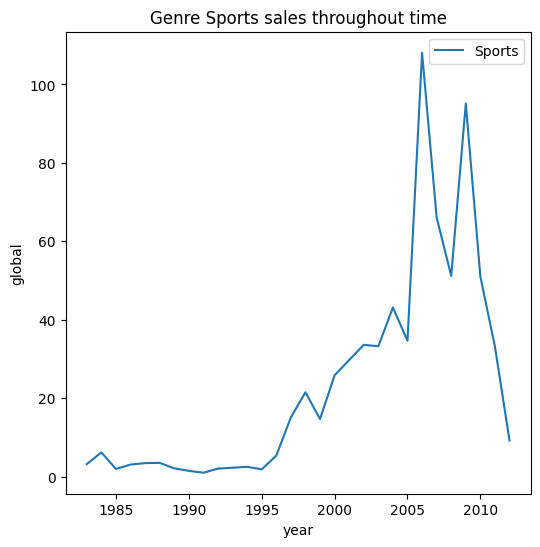

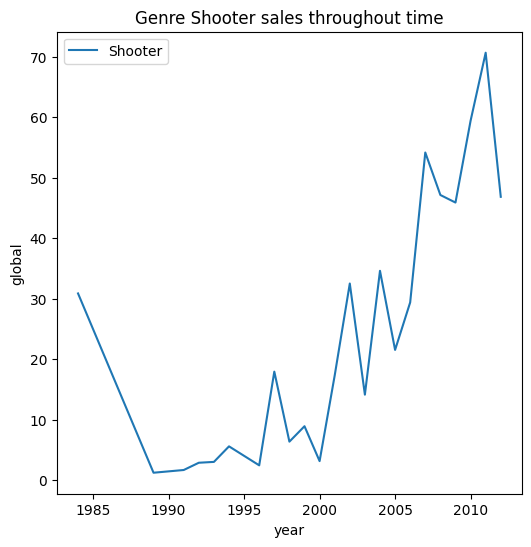

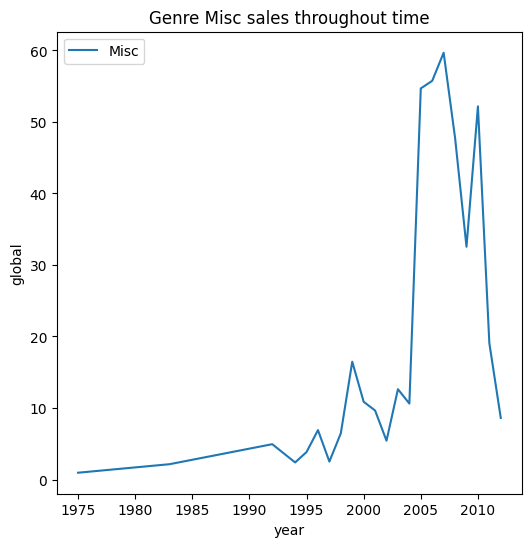

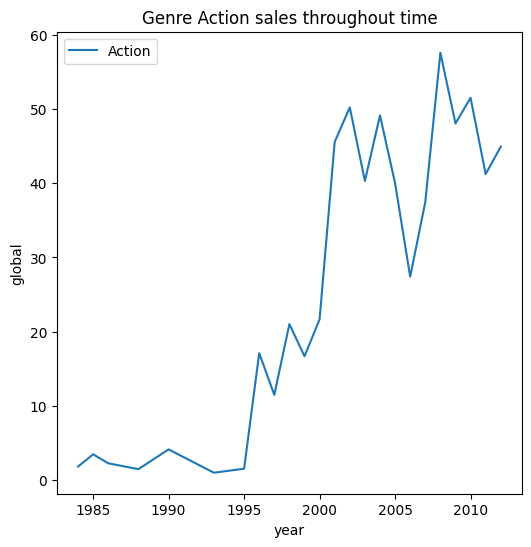

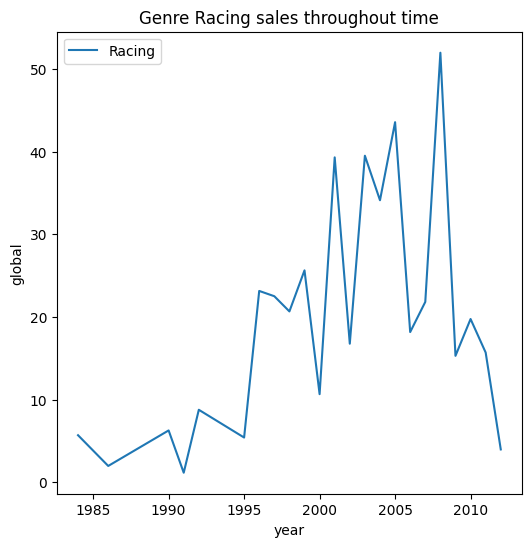

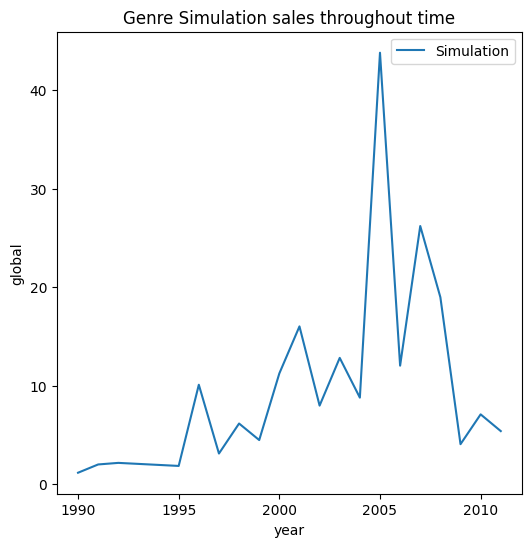

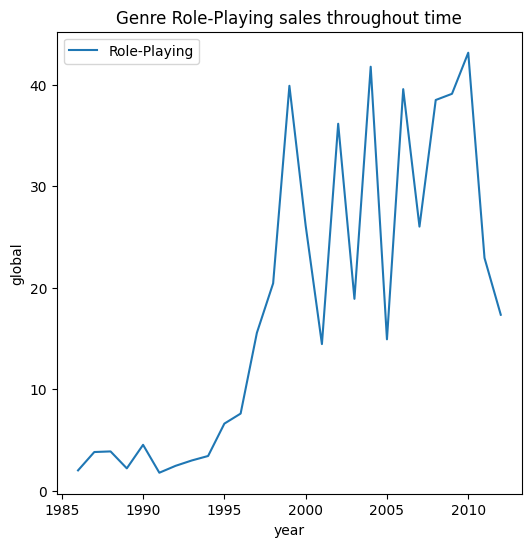

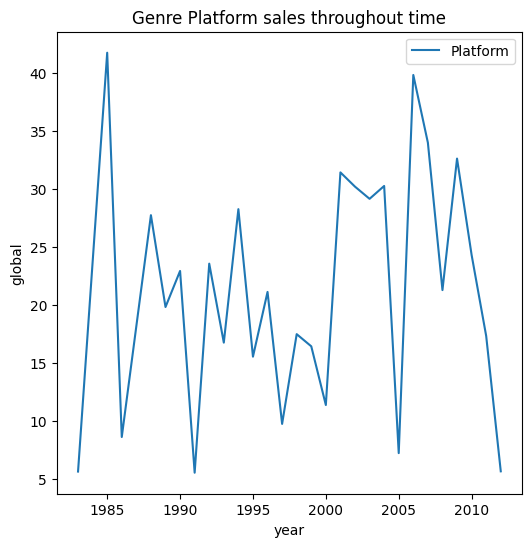

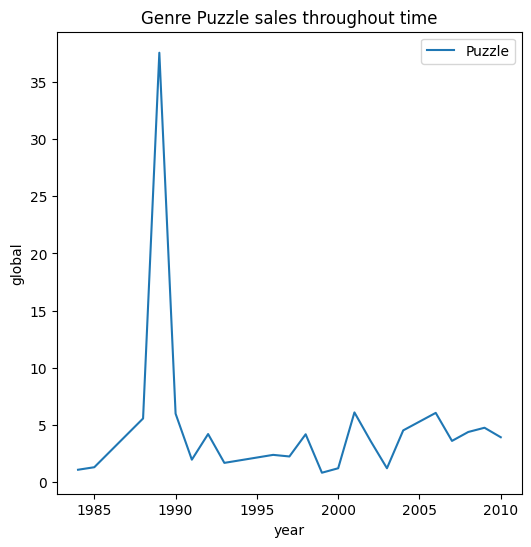

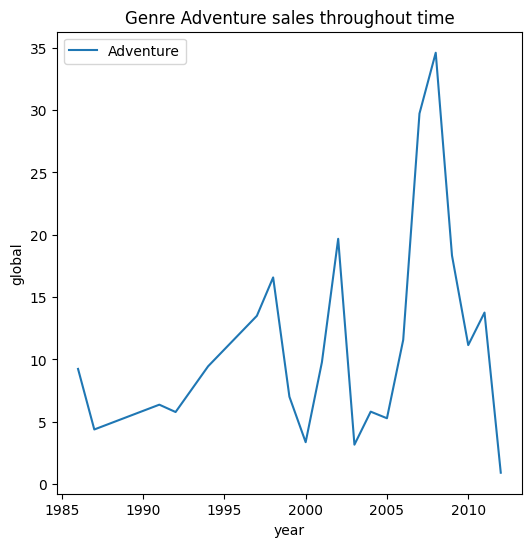

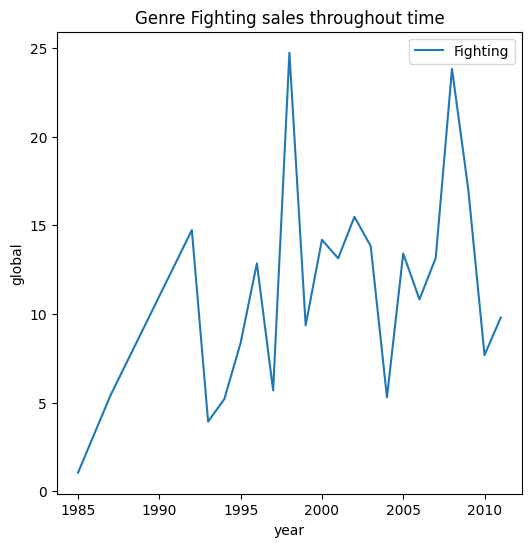

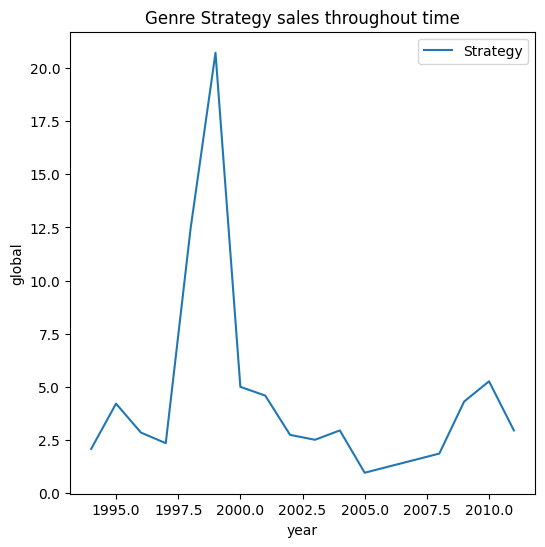

In [12]:
for genre in genre_sales['genre'].unique():
    plt.figure(figsize=(6, 6))
    sns.lineplot(data = genre_sales[genre_sales['genre'] == genre], x = 'year', y = 'global', label=genre)
    plt.title(f'Genre {genre} sales throughout time')
    plt.show()

• Misc: low sales between 1975-1995 where little peaks started appearing in 1996, 1999 and reach its maximum peak around 2007. Second higher peak around 2010 where it started falling. 

• Platforms: had peaks and drops since 1975-2010, higher peak sale around 1985 with a drop around 1986. After this we have drops and peaks from around 1988-2005 with a big sales drop below 10 million sales. Second higher peak around 2006 stabilized until 2012 with another big drop.

• Sports: didn’t have big sales impact from 1975-2000 where it started raising until it’s greater peak in 2006. second higher peak on 2010 and then a big drop on 2012.

• Action: low sales between 1975-1995 where it started to grow in sales on 1996 and keeps growing until 2012. Higher peak between 1975-2012 is found around 2008. 

• Puzzle: had a great impact in 1989 with it’s higher peak, however it lowered from +35 million sells to -10 millions sells from 1990-2012.

• Racing: sales lower than 10 millions from 1975-1995. Here, we find a growth +20 million sells on 1996, having multiple peaks and drops. Higher peak around 2008 with +50 million sells. 

• Shooter: big amount of sale on 1884 with Duck Hunt with +30 million units sold. After this we have a big drop down until 1990 where it started slowly gaining sells until 2011 having in this year its greater peak with sells between 65-70 millions of units. 

• Fighting: started growing on 1985 with its first peak around 1992 with around 15 million units sold. Greater peak around 1998 with near to 25 million units sold, closely followed by its second higher peak around 2009 with a bit less than 25 million units sold. Through time we can see different drops and growth when it comes to sells. 

• Adventure: sells equal or lower to 20 million from 1986-1998. It starting growing back again between 2000-2002 having after it another drop down. Higher peak on 2008 around 35 million units sold. 

• Role-playing: under 10 million units sold from 1986-1996, when it started growing up around 40 million units sold. This amount is reached multiple times over time from 1996-2010 with multiple dropdowns.

• Simulation: has a clear peak on 2005 with +40 million units sold, rest of peaks are under 30 millions. 

• Strategy: didn’t change much during time but has a clear peak around 1998-1999 surpassing the 20 million units.  


Genre's: platform, fighting and racing has the bigger number of changes between 1984-2012.
As per barplot below, we can see that top genre sells are in 'Sports', closely followed by genre 'Shooter'. 

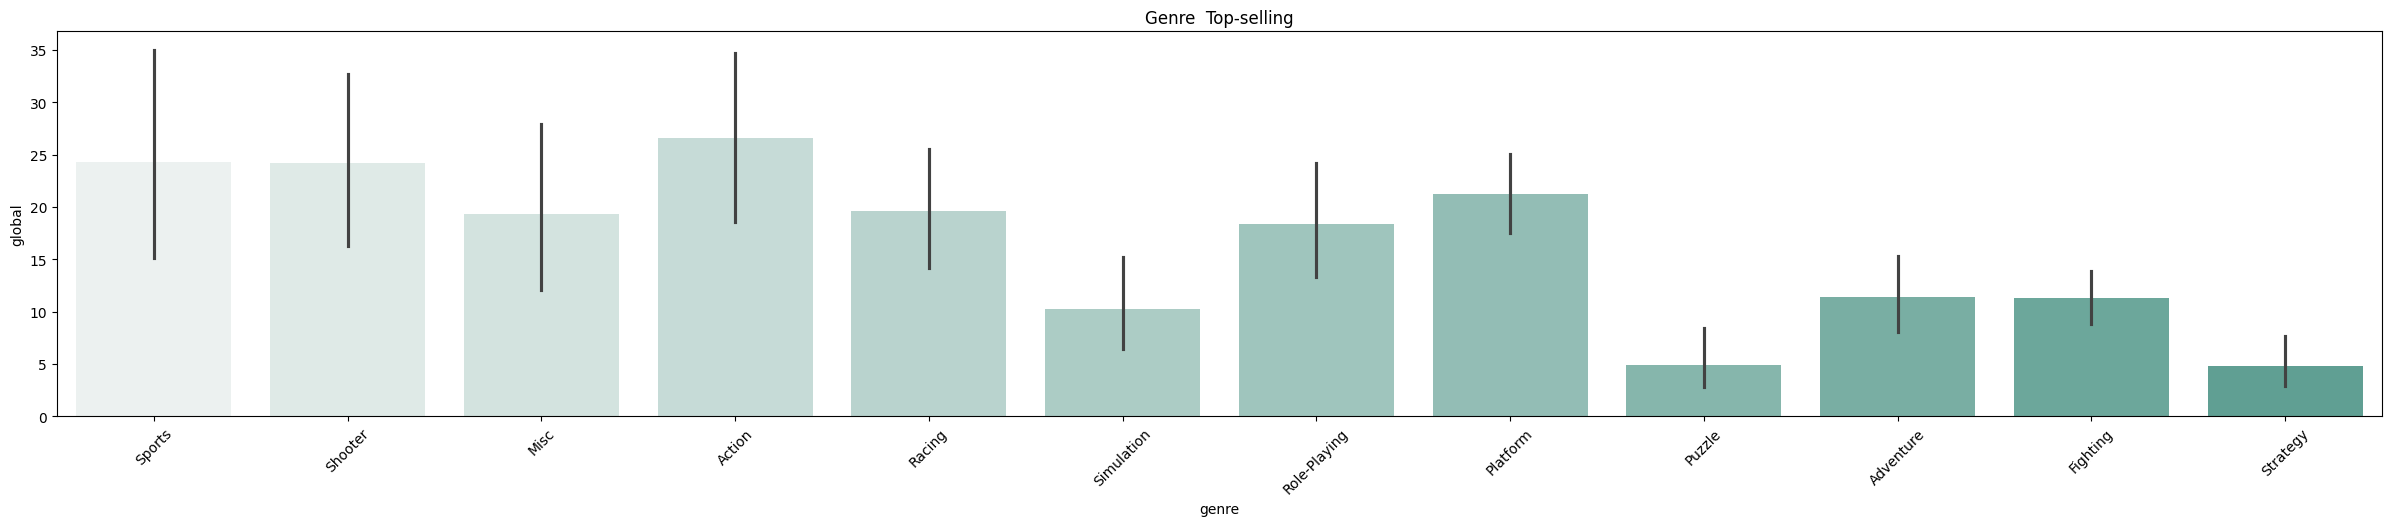

In [13]:
fc.barplot([genre_sales], ['Genre'], 'genre')

In [14]:
genre_sales['global'].describe().round(3)

count    277.000
mean      17.137
std       17.318
min        0.840
25%        3.960
50%       10.870
75%       25.640
max      108.080
Name: global, dtype: float64

We can see that average global sales per genre is 17.14 million units sold, with a standard deviation of 17.32 million units sold. 

Along the different genres, we have a minimum amount of 0.84 million units sold which differs in a 99.22% with the maximum amount of million units sold, which is a very high difference. Half of the genres has up to 10.87 million units sold and 75% of them between 10.87-25.64 million units sold which still differs in a 76.23% with the maximum amount of million units sold. 

## EDA Publisher sales influence

In [15]:
publisher_sales = fc.df_grouping(sales_df, 'publisher', 'global')
publisher_sales

,year,publisher,global
0,2006,Nintendo,190.95
1,2009,Nintendo,121.12
2,2005,Nintendo,115.95
3,2007,Nintendo,100.80
4,2008,Nintendo,80.07
...,...,...,...
453,2008,Pinnacle,0.85
454,1999,Atari,0.84
455,2002,Empire Interactive,0.84
456,2003,Acclaim Entertainment,0.84


In [16]:
publisher_sales['publisher'].unique()

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Microsoft Game Studios', 'Sony Computer Entertainment', 'Ubisoft',
       'Take-Two Interactive', 'Konami Digital Entertainment',
       'Bethesda Softworks', 'THQ', 'LucasArts', 'Sega',
       'Virgin Interactive', 'Eidos Interactive',
       'Warner Bros. Interactive Entertainment', 'Capcom', 'Square',
       'Atari', 'Square Enix', 'Namco Bandai Games',
       'Disney Interactive Studios', 'Acclaim Entertainment', '505 Games',
       'Red Orb', 'Vivendi Games', 'GT Interactive', 'Midway Games',
       'Hasbro Interactive', 'Universal Interactive', 'Codemasters',
       'RedOctane', 'MTV Games', 'Enix Corporation', '989 Studios',
       'Deep Silver', 'Level 5', 'Infogrames', 'D3Publisher',
       'Hudson Soft', 'Global Star', 'Tecmo Koei', 'id Software',
       'Havas Interactive', 'Majesco Entertainment', 'Accolade', 'JVC',
       'Crave Entertainment', 'Valve Software', 'Maxis', 'Square EA',
       '3DO', 'Gotham Games', 

In [17]:
# to ease analysis I'll split publishers in 2 categories: major publishers and indie publishers

major_publisher_df = publisher_sales.copy()
major_publisher_df = major_publisher_df[major_publisher_df['publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'Konami Digital Entertainment', 'Bethesda Softworks', 'THQ', 'Sega', 'Capcom', 'Square Enix', 'Namco Bandai Games', 'Warner Bros. Interactive Entertainment'])]


indie_publisher_df = publisher_sales.copy()
indie_publisher_df = indie_publisher_df[indie_publisher_df['publisher'].isin(['505 Games', 'Deep Silver', 'Level 5', 'D3Publisher', 'Global Star', 'Hudson Soft', 'Majesco Entertainment', 'Crave Entertainment', 'Valve Software', 'City Interactive', 'Sammy Corporation', 'Koch Media', 'Play It', 'GSP', 'Russel', 'Success', 'Tomy Corporation'])]

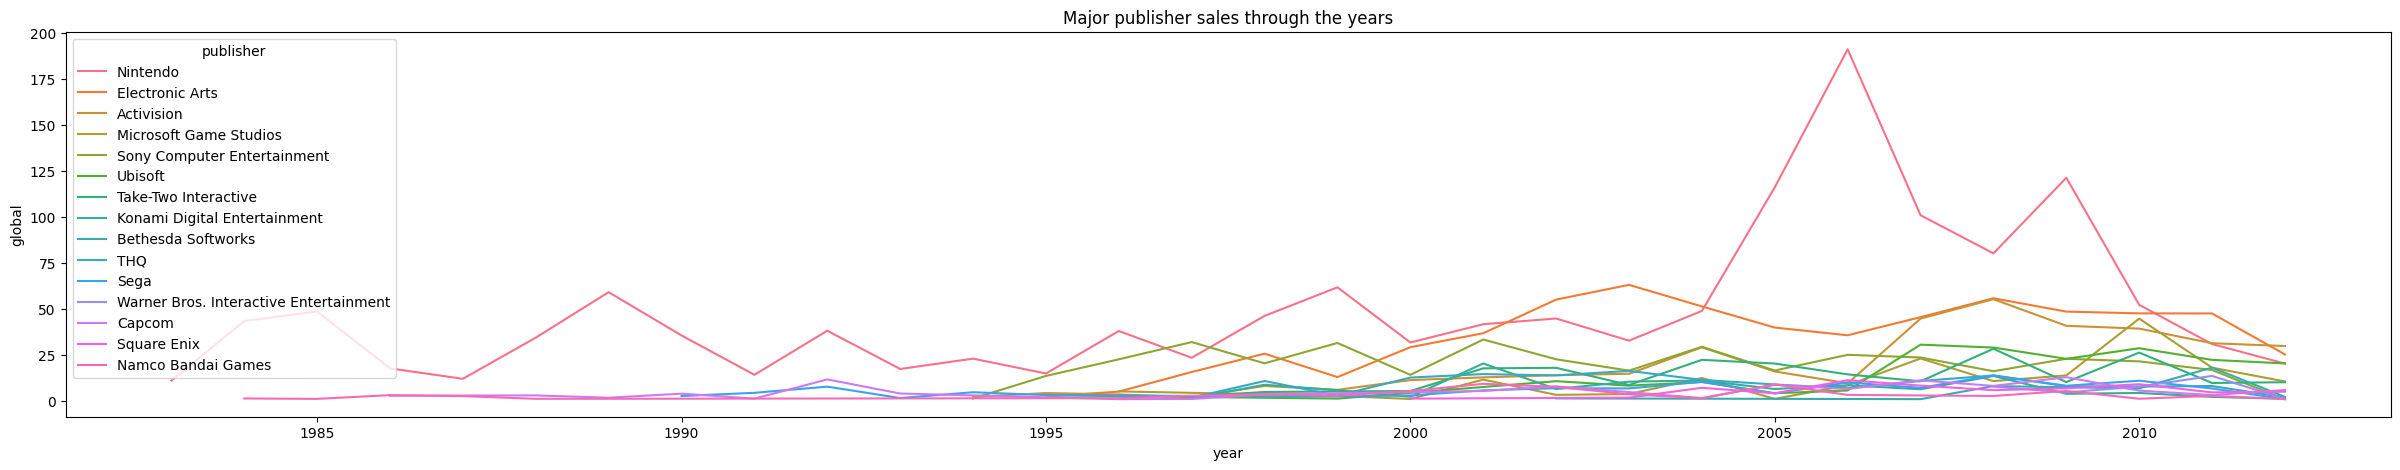

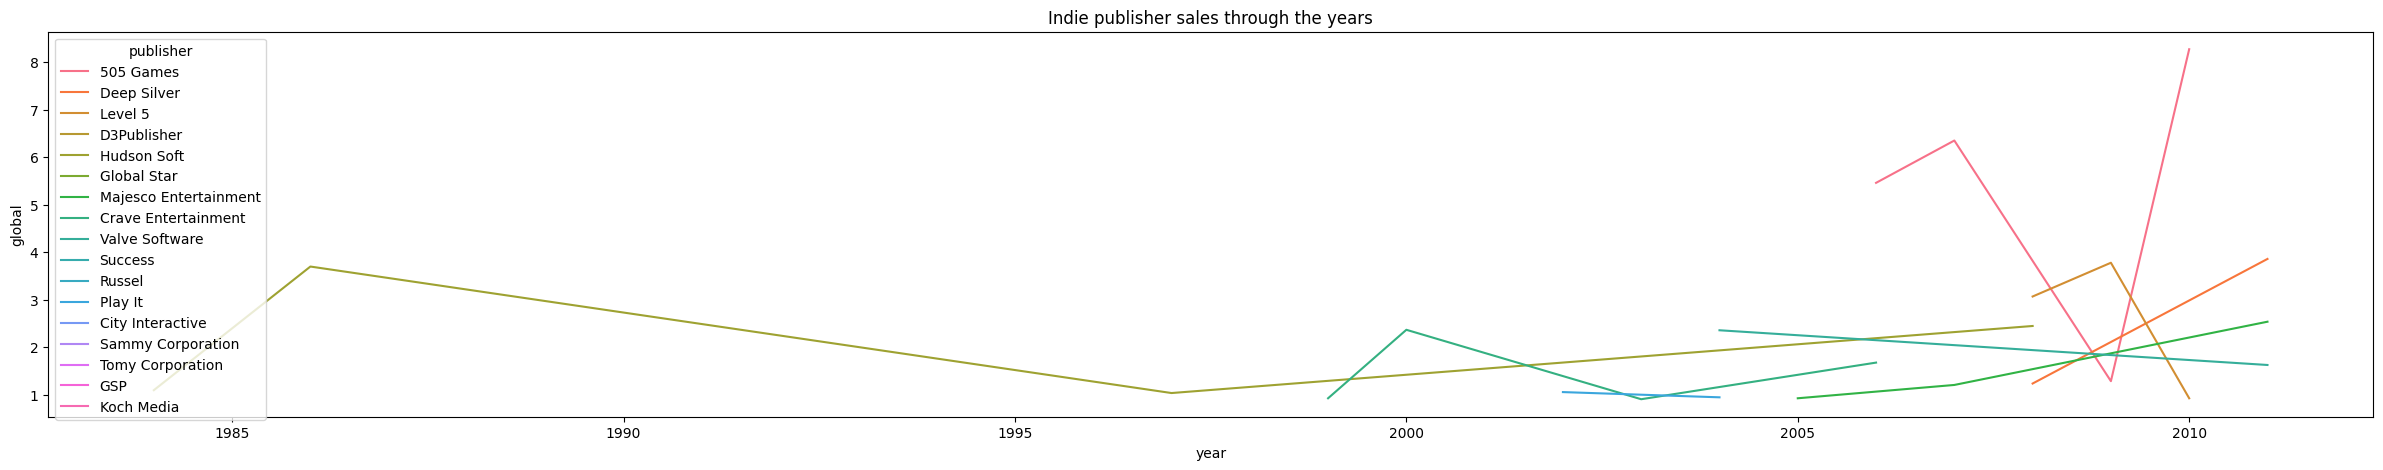

In [18]:
publisher_df_list = [major_publisher_df, indie_publisher_df]
publisher_names = ['Major publisher', 'Indie publisher']

fc.lineplot(publisher_df_list, publisher_names, 'publisher')

• Indies publishers: 
    Throughout time we cannot see a high predominance between the indies publishers from 1984-2012. It slightly show a bit more sells 505 Games and Deep Silver publishers around 2006-2010.

• Major publishers: 
    We can see a high predominance througout all time by Nintendo, growing some small competence around 1996-2012 by Electronic Arts and Sony Computer Entertainment. From 2006 onwards Activision gaines a bit more of importance reaching Electronic Arts. 

On the below barplot, we can see in more detail:

• Indies publishers: we confirm a predominance by 505 Games, followed by around half of the sales by Deep Silver and Level 5 publisher. 
• Major publishers: we cam confirm a high predominance by Nintendo publisher with +60 million units sold, followed by Electronic Arts with less than 50 million units sold, a high difference between both predominant publishers. 


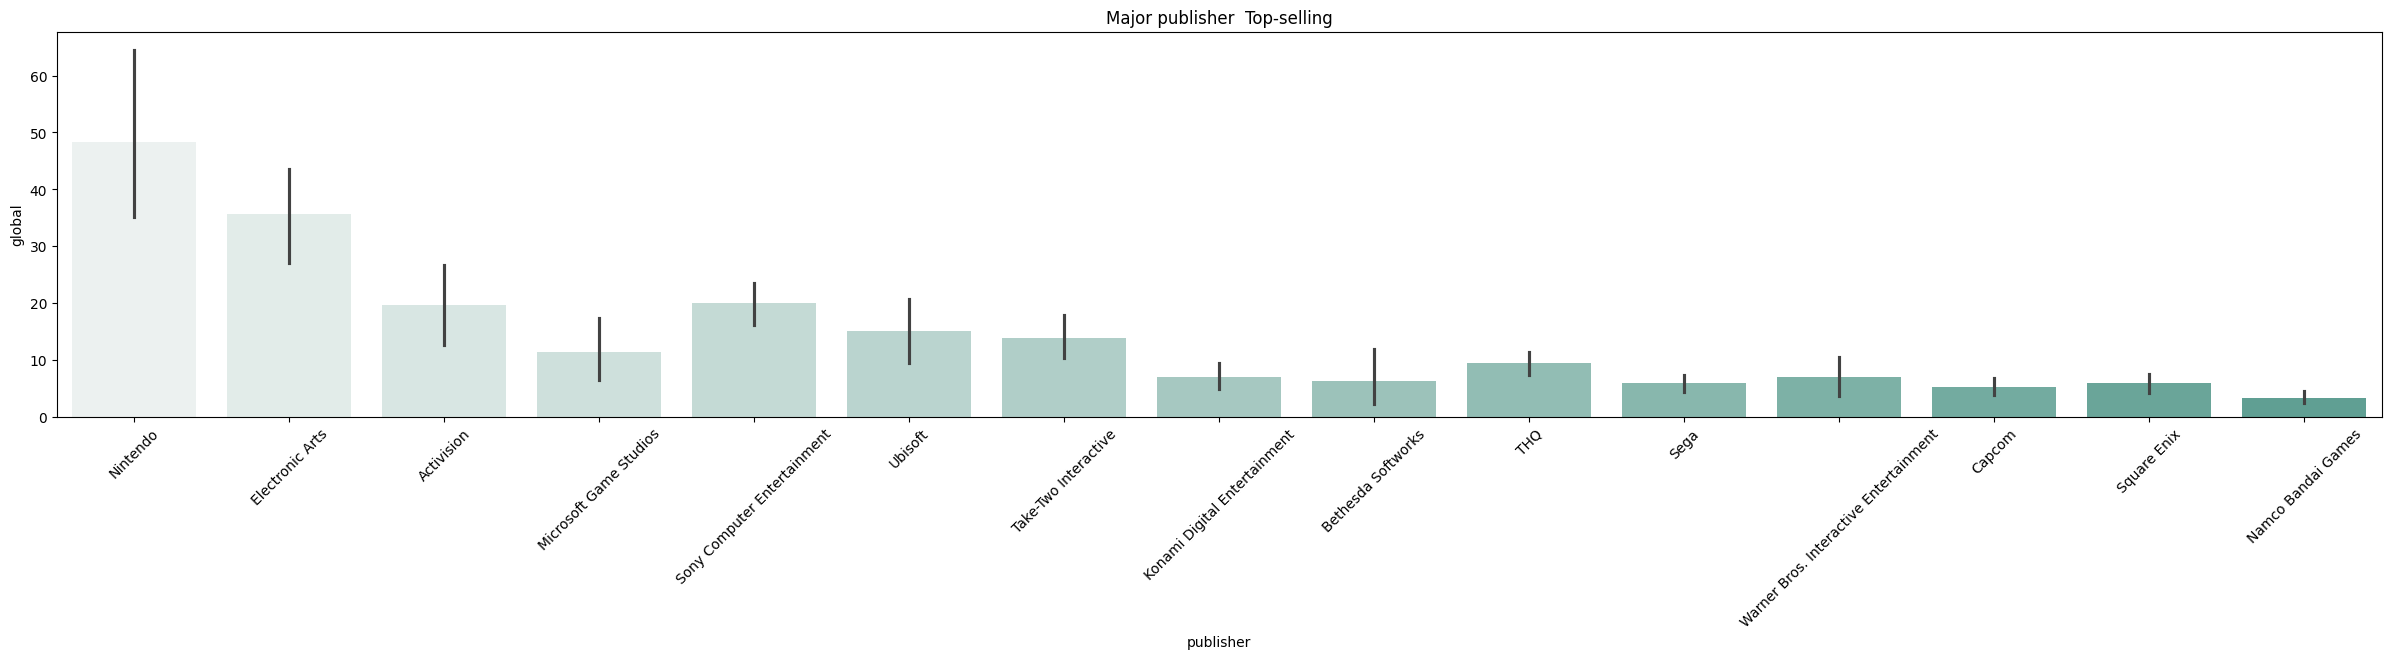

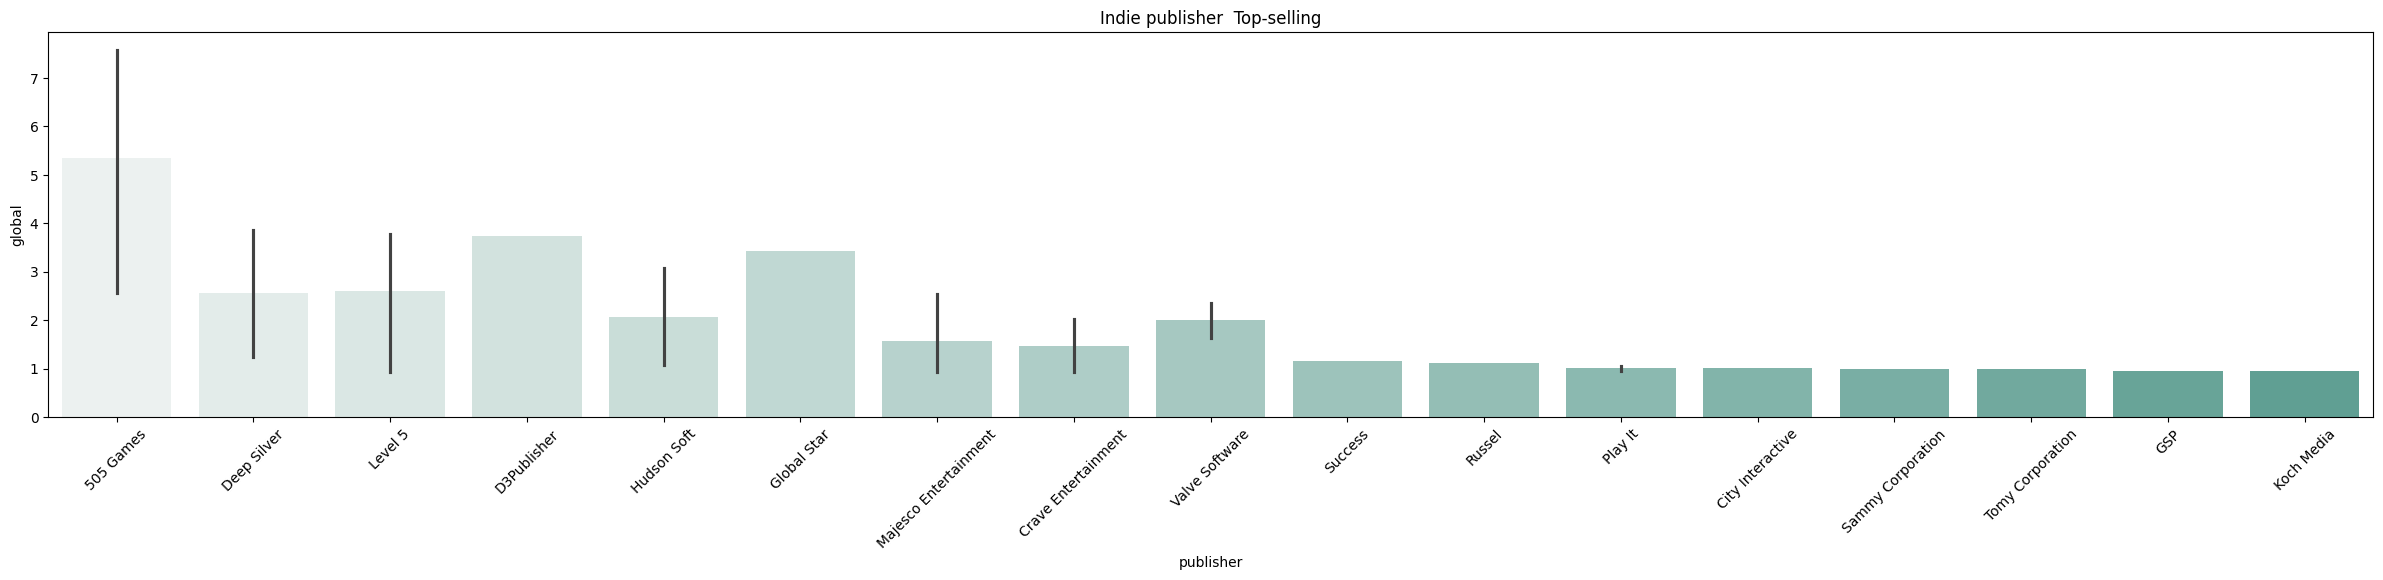

In [19]:
fc.barplot(publisher_df_list, publisher_names, 'publisher')

In [20]:
publisher_sales['global'].describe().round(3)

count    458.000
mean      10.365
std       17.280
min        0.830
25%        1.700
50%        4.005
75%       11.042
max      190.950
Name: global, dtype: float64

We can see that average global sales per publisher is set in 10.37 million units sold, with a standard deviation of 17.28 million units sold. 

Along the publishers, we have a minimum amount of 0.83 million units sold which differs in a 99.57% with the maximum amount of million units sold, which is, again, a very high difference. Half of the publishers has up to 4 million units sold and 75% of them between 4-11.04 million units sold which still differs in a 74.22% with the maximum amount of million units sold. 